In this dataset i selected a complex regression dataset and tried to increase accuracy as much as possible at starting i use ANN and then i used Supervised ML

There were 17 model tried using ANN and AutoML and the best model was of supervised ML using
H2o for AutoML and the best model was StackedEnsemble, ANN was close by

1. After importing the data i observed that there were too many categorical columns so i decided to keep those columns only which have less no. of category, but almost all of the columns were having proper no. of category.

2. After then i did label encoding on all the categorical columns

3. Then i performed some feature selection
    1. I used `VarianceThreshold` and `Pearson Correlation` for removing all the similar columns but i did not found it very promising so i dropped these techiques
    2. I used `mutual_info_selection` and `chi square test` to remove most important features and took a intersection of columns of both the techniques and there were 24 columns in common which were selected

4. I performed normalization on the dataset

5. Created a ANN architecture and custom tuned it's hyperparameters (Model 0)

6. Used Keras tuner for tuning the ANN architecture by 
    1. Selecting no of layers
    2. Selecting no of neurons per layer
    3. Selecting the optimizer
    4. All in one tuner

7. Used more techniques to decrease the overfitting
    1. Early Stopping
    2. Data scaling
    3. Regularization
    4. Weight Initialization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
prices = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
prices.shape

(1460, 81)

In [4]:
prices_info = prices.select_dtypes(exclude=['int64', 'float64'])
prices_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [5]:
MSZoning = prices_info['MSZoning'].unique()
for category in MSZoning:
    instances = prices_info[prices_info['MSZoning'] == category]['MSZoning'].count()
    print(category, " ", instances)

RL   1151
RM   218
C (all)   10
FV   65
RH   16


In [6]:
prices_info['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [7]:
for col in prices_info.columns:
    unique_values = prices_info[col].unique()
    print(col)
    print()
    for category in unique_values:
        instances = prices_info[prices_info[col] == category][col].count()
        print(category, " ", instances)
    print()

MSZoning

RL   1151
RM   218
C (all)   10
FV   65
RH   16

Street

Pave   1454
Grvl   6

Alley

nan   0
Grvl   50
Pave   41

LotShape

Reg   925
IR1   484
IR2   41
IR3   10

LandContour

Lvl   1311
Bnk   63
Low   36
HLS   50

Utilities

AllPub   1459
NoSeWa   1

LotConfig

Inside   1052
FR2   47
Corner   263
CulDSac   94
FR3   4

LandSlope

Gtl   1382
Mod   65
Sev   13

Neighborhood

CollgCr   150
Veenker   11
Crawfor   51
NoRidge   41
Mitchel   49
Somerst   86
NWAmes   73
OldTown   113
BrkSide   58
Sawyer   74
NridgHt   77
NAmes   225
SawyerW   59
IDOTRR   37
MeadowV   17
Edwards   100
Timber   38
Gilbert   79
StoneBr   25
ClearCr   28
NPkVill   9
Blmngtn   17
BrDale   16
SWISU   25
Blueste   2

Condition1

Norm   1260
Feedr   81
PosN   19
Artery   48
RRAe   11
RRNn   5
RRAn   26
PosA   8
RRNe   2

Condition2

Norm   1445
Artery   2
RRNn   2
Feedr   6
PosN   2
PosA   1
RRAn   1
RRAe   1

BldgType

1Fam   1220
2fmCon   31
Duplex   52
TwnhsE   114
Twnhs   43

HouseStyle

2Story   445
1S

Since there are too many features we will first do feature selection

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
for col in prices.columns:
    if prices[col].dtype == 'object':
        le = LabelEncoder()
        prices[col] = le.fit_transform(prices[col])

In [10]:
prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(prices)

VarianceThreshold()

In [13]:
var_thres.get_support() 
# All the values are True therefore there are no two columns with zero in data 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [14]:
# Feature Selection using Pearson Corelation 

# If independent features are highly coorelated with dependent features 
# then we don't remove those features 

# But if two independent features are highly coorelated 
# then we can remove those features instead of multiple we can keep 1 feature from it

In [15]:
corr = prices.corr()

In [16]:
fig = px.imshow(corr, color_continuous_scale='thermal')
fig.show()

In [17]:
prices.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,0.008916,-0.001530,0.032122,-0.019659,0.013324,...,0.057044,-0.033928,-0.000399,0.037057,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-0.022844,...,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-0.001192,...,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,-0.040886,0.138101,-0.169641,-0.080757,NaN,...,0.206167,-0.195051,-0.040862,-0.006629,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,-0.197131,0.060105,-0.165315,-0.149083,0.010123,...,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.011200,0.001205,0.003690,0.013094,-0.033455,-0.011599,-0.051552,...,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,0.007450,-0.014261,-0.025043,0.020944,0.036449,0.020507,0.023353,...,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.034559,0.012292,0.014339,0.008205,-0.000911,-0.025754,-0.126770,...,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.063372,0.034169,0.006064,0.035717,-0.038118,0.033809,-0.089701,...,-0.067251,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
# This is taking positive as well as negative correlation
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features_80 = correlation(prices, threshold=0.8)
corr_features_90 = correlation(prices, threshold=0.9)

In [20]:
print("80% : " , len(set(corr_features_80)))
print("90% : " , len(set(corr_features_90)))

80% :  6
90% :  0


In [21]:
# Since there are no two indepnedent columns with 
# more than 90% similarity i won't remove any column unsing this method

In [22]:
# 3. Method for feature selection
# Using Information Gain 
# If you use the function `mutual_info_classif` and the you get if high 
# then that feature is important
# Mutual information and information gain are both similar and act the same on same data
# 

In [23]:
# Dropping the prices column
prices = prices.drop('Id', axis=1)
prices

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,3,2,4,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,3,0,2,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,3,4,4,0,4,2010,8,4,142125


In [24]:
target_column = prices['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prices.drop(labels=['SalePrice'], axis=1),
                                                    prices['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=42)
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,20,3,80.0,10400,1,2,3,3,0,4,...,0,0,3,2,4,0,5,2008,8,4
1452,180,4,35.0,3675,1,2,3,3,0,4,...,0,0,3,4,4,0,5,2006,8,4
762,60,1,72.0,8640,1,2,3,3,0,4,...,0,0,3,4,4,0,6,2010,2,4
932,20,3,84.0,11670,1,2,0,3,0,0,...,0,0,3,4,4,0,3,2007,8,4
435,60,3,43.0,10667,1,2,1,3,0,1,...,0,0,3,4,4,0,4,2009,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,3,78.0,9317,1,2,0,3,0,4,...,0,0,3,4,4,0,3,2007,8,4
1130,50,3,65.0,7804,1,2,3,3,0,4,...,0,0,3,2,4,0,12,2009,8,4
1294,20,3,60.0,8172,1,2,3,3,0,4,...,0,0,3,4,4,0,4,2006,8,4
860,50,3,55.0,7642,1,2,3,3,0,0,...,0,0,3,0,4,0,6,2007,8,4


In [25]:
X_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      190
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [26]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train, random_state=42)
mutual_info

array([0.28925849, 0.10197446, 0.18984679, 0.15228842, 0.        ,
       0.00171531, 0.07050533, 0.02719099, 0.        , 0.04520072,
       0.        , 0.48481844, 0.06154251, 0.01230152, 0.04879205,
       0.12881296, 0.5214293 , 0.11212708, 0.31954945, 0.24500254,
       0.01688097, 0.01047777, 0.15866524, 0.17960021, 0.1090338 ,
       0.06723191, 0.30463538, 0.03366116, 0.18147954, 0.30928014,
       0.04614142, 0.07310961, 0.16863026, 0.14364631, 0.02234411,
       0.00818363, 0.15011406, 0.31604879, 0.00237899, 0.16449359,
       0.05761732, 0.04485224, 0.28769158, 0.22853718, 0.00407119,
       0.4519736 , 0.0269805 , 0.00376417, 0.24202188, 0.07476376,
       0.05692822, 0.01724224, 0.32135204, 0.1631167 , 0.00889272,
       0.16197499, 0.22980128, 0.22119184, 0.25781879, 0.26688549,
       0.35201527, 0.34282182, 0.06976745, 0.09633617, 0.05162742,
       0.0890666 , 0.14934362, 0.04051377, 0.00055998, 0.01864734,
       0.00467546, 0.01316383, 0.05819959, 0.        , 0.00788

In [27]:
# Here more the value closer to 1 the more dependent the feature is
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.521429
Neighborhood    0.484818
GrLivArea       0.451974
GarageCars      0.352015
GarageArea      0.342822
                  ...   
3SsnPorch       0.000560
MiscFeature     0.000000
LandSlope       0.000000
Utilities       0.000000
Street          0.000000
Length: 79, dtype: float64

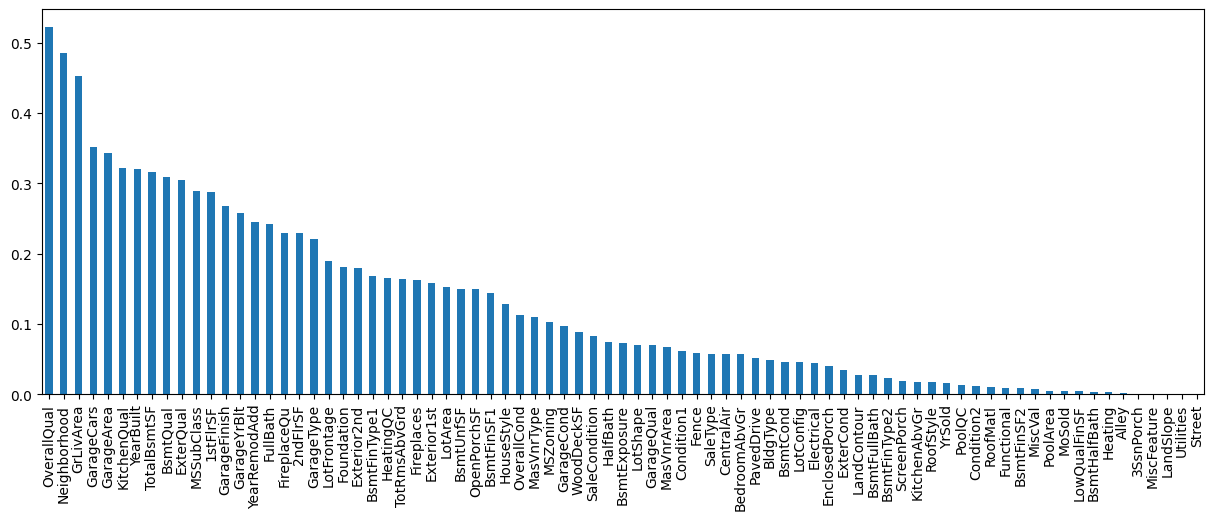

In [28]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 5));

In [29]:
# Selecting to features
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(X_train.fillna(0), y_train)
selected_features_info_gain = X_train.columns[selected_top_columns.get_support()]

In [30]:
# 4. Chi square Test
# Before applying chi square test we have to apply label encoding on all the categorical columns
# chi2 returns 2 values : Fscore and pvalue
from sklearn.feature_selection import chi2
import numpy as np
np.random.seed(42)
f_p_values = chi2(X_train.fillna(0), y_train)
f_p_values
# First column is the F-score -> More the value of F-score more important the feature is
# Second column is the p_value -> Less the value of p_value more important the feature is

(array([1.55334869e+04, 7.75545587e+01, 1.27904990e+04, 1.04131000e+07,
        2.41805084e+00, 4.21673647e+01, 6.34998866e+02, 9.19832548e+01,
        3.39666667e+02, 4.89454339e+02, 7.25210399e+02, 1.89752600e+03,
        1.61585464e+02, 1.33161133e+01, 1.61643494e+03, 6.67398222e+02,
        2.63812306e+02, 1.23589400e+02, 3.40425924e+02, 1.45294482e+02,
        2.81072383e+02, 1.59063690e+02, 5.45028508e+02, 6.39343755e+02,
        2.22872809e+02, 2.01954035e+05, 1.44129366e+02, 7.57009942e+01,
        2.28811899e+02, 2.67707733e+02, 9.19858993e+01, 3.60865008e+02,
        6.66496404e+02, 2.91516011e+05, 8.52043207e+01, 2.59491812e+05,
        2.14377925e+05, 1.29187180e+05, 5.18014334e+01, 1.18077645e+03,
        4.51147683e+01, 1.59307420e+02, 9.04274252e+04, 3.42920133e+05,
        1.99330106e+05, 1.40044869e+05, 3.49191056e+02, 4.37845607e+02,
        1.34466594e+02, 4.02126699e+02, 1.25424780e+02, 2.12375177e+01,
        2.17471048e+02, 2.62333048e+02, 8.10003400e+01, 4.375098

In [31]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=False)

SaleCondition    1.0
MasVnrType       1.0
ExterQual        1.0
Foundation       1.0
BsmtQual         1.0
                ... 
GarageArea       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GarageYrBlt      0.0
MSSubClass       0.0
Length: 79, dtype: float64

In [32]:
# Selecting top 50 percentile
import numpy as np
threshold = np.percentile(p_values, 50)
selected_features_p_values = p_values[p_values <= threshold].index
selected_features_p_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'YearBuilt',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold'],
      dtype='object')

In [33]:
# Taking intersection of both the columns (p_values and info_gain)
common_features = list(set(selected_features_p_values).intersection(set(selected_features_info_gain)))
len(common_features)

24

In [34]:
prices = prices[common_features]

In [35]:
prices

,GarageArea,GrLivArea,GarageFinish,MSSubClass,Exterior1st,2ndFlrSF,YearBuilt,GarageYrBlt,Neighborhood,OpenPorchSF,...,LotFrontage,BsmtUnfSF,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Fireplaces,HouseStyle,1stFlrSF,WoodDeckSF
0,548,1710,1,60,12,854,2003,2003.0,5,61,...,65.0,150,3,2,706,856,0,5,856,0
1,460,1262,1,20,8,0,1976,1976.0,24,0,...,80.0,284,1,0,978,1262,1,2,1262,298
2,608,1786,1,60,12,866,2001,2001.0,5,42,...,68.0,434,2,2,486,920,1,5,920,0
3,642,1717,2,70,13,756,1915,1998.0,6,35,...,60.0,540,3,0,216,756,1,5,961,0
4,836,2198,1,60,12,1053,2000,2000.0,15,84,...,84.0,490,0,2,655,1145,1,5,1145,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,1647,1,60,12,694,1999,1999.0,8,40,...,62.0,953,3,5,0,953,1,5,953,0
1456,500,2073,2,20,9,0,1978,1978.0,14,0,...,85.0,589,3,0,790,1542,2,2,2073,349
1457,252,2340,1,70,5,1152,1941,1941.0,6,60,...,66.0,877,3,2,275,1152,2,5,1188,0
1458,240,1078,2,20,8,0,1950,1950.0,12,0,...,68.0,0,2,2,49,1078,0,2,1078,366


In [36]:
# X_train -> prices
# y_train -> target_column
target_column

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [37]:
prices = prices.fillna(0)

prices

,GarageArea,GrLivArea,GarageFinish,MSSubClass,Exterior1st,2ndFlrSF,YearBuilt,GarageYrBlt,Neighborhood,OpenPorchSF,...,LotFrontage,BsmtUnfSF,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Fireplaces,HouseStyle,1stFlrSF,WoodDeckSF
0,548,1710,1,60,12,854,2003,2003.0,5,61,...,65.0,150,3,2,706,856,0,5,856,0
1,460,1262,1,20,8,0,1976,1976.0,24,0,...,80.0,284,1,0,978,1262,1,2,1262,298
2,608,1786,1,60,12,866,2001,2001.0,5,42,...,68.0,434,2,2,486,920,1,5,920,0
3,642,1717,2,70,13,756,1915,1998.0,6,35,...,60.0,540,3,0,216,756,1,5,961,0
4,836,2198,1,60,12,1053,2000,2000.0,15,84,...,84.0,490,0,2,655,1145,1,5,1145,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,1647,1,60,12,694,1999,1999.0,8,40,...,62.0,953,3,5,0,953,1,5,953,0
1456,500,2073,2,20,9,0,1978,1978.0,14,0,...,85.0,589,3,0,790,1542,2,2,2073,349
1457,252,2340,1,70,5,1152,1941,1941.0,6,60,...,66.0,877,3,2,275,1152,2,5,1188,0
1458,240,1078,2,20,8,0,1950,1950.0,12,0,...,68.0,0,2,2,49,1078,0,2,1078,366


In [38]:
X_train, X_test, y_train, y_test = train_test_split(prices, 
                                                    target_column, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [39]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [40]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

print(X_train_normalized.shape)
print(X_train.shape)
print(X_test.shape)

2024-08-17 12:16:36.601816: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 12:16:36.601960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 12:16:36.758995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(1168, 24)
(1168, 24)
(292, 24)


In [41]:
y_train_np = y_train.numpy().reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_np)
y_train_scaled_tf = tf.convert_to_tensor(y_train_scaled)

In [42]:
y_test_np = y_test.numpy().reshape(-1, 1)
y_test_scaled = scaler.fit_transform(y_test_np)
y_test_scaled_tf = tf.convert_to_tensor(y_test_scaled)

In [43]:
# How to apply metrics in regression 
1. MSE -> The output layer must have activation 'linear' 
    other layers can have different activations
    When your data does'nt have outliers then use MSE otherwise use MAE
2. MAE -> Use when there are outliers in the data
3. Huber Loss -> Use when your data have too many outliers
4. Binary Cross Entropy -> When your problem is classification and your data has 2 classes 
    output layer activation must be 'sigmoid' 
    other layers can have different activations
5. Categorical Cross Entropy -> When your problem is classification and 
    your data has multiple classes
    output layer will have activation 'softmax'

SyntaxError: unterminated string literal (detected at line 4) (33594666.py, line 4)

In [44]:
# Model 1
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5827 - mae: 0.5827 - val_loss: 0.3233 - val_mae: 0.3233
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2760 - mae: 0.2760 - val_loss: 0.2982 - val_mae: 0.2982
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2677 - mae: 0.2677 - val_loss: 0.2545 - val_mae: 0.2545
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2566 - mae: 0.2566 - val_loss: 0.2353 - val_mae: 0.2353
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2365 - mae: 0.2365 - val_loss: 0.2790 - val_mae: 0.2790
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2262 - mae: 0.2262 - val_loss: 0.2714 - val_mae: 0.2714
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2575 - mae: 0.2575 - val_loss: 0.2718 - val_mae: 0.2718
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2331 - mae: 0.2331 - val_loss: 0.2340 - val_mae: 0.2340
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.209

In [45]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2447 - mae: 0.2447 


In [46]:
# Model 1
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4984 - mae: 0.4984 - val_loss: 0.2908 - val_mae: 0.2908
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3008 - mae: 0.3008 - val_loss: 0.2648 - val_mae: 0.2648
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2547 - mae: 0.2547 - val_loss: 0.2632 - val_mae: 0.2632
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2447 - mae: 0.2447 - val_loss: 0.2444 - val_mae: 0.2444
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2751 - mae: 0.2751 - val_loss: 0.2448 - val_mae: 0.2448
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2338 - mae: 0.2338 - val_loss: 0.2715 - val_mae: 0.2715
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2228 - mae: 0.2228 - val_loss: 0.2652 - val_mae: 0.2652
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2197 - mae: 0.2197 - val_loss: 0.2584 - val_mae: 0.2584
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.212

In [47]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2897 - mae: 0.2897 


In [48]:
y_preds = scaler.inverse_transform(y_preds_scaled)

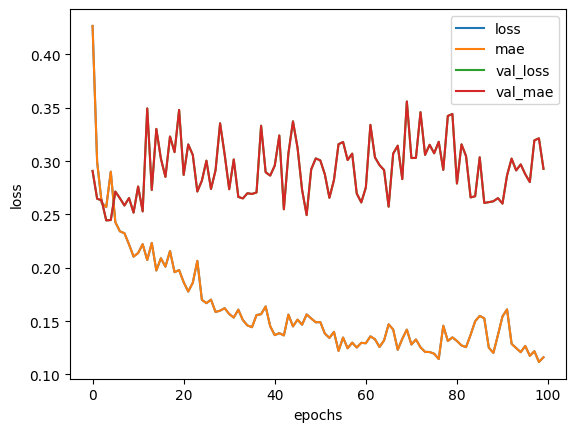

In [49]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [50]:
# # Keras Tuner
# 1. How to select appropriate optimizer
# 2. How to select no of nodes in a layer
# 3. How to select no of layers
# 4. All in one model

In [51]:
!pip install keras-tuner

In [55]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [53]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(24,)))
    model.add(Dense(48, activation="relu"))
    model.add(Dense(1, activation="relu"))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
    model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanAbsoluteError(), metrics=['mae'])
    return model


In [54]:
tuner = kt.RandomSearch(build_model, 
                        objective = 'val_mae',
                        max_trials = 5)

In [56]:
print(X_test_normalized.shape)
print(X_train_normalized.shape)

(292, 24)
(1168, 24)


In [57]:
best_optimizer = tuner.search(X_train_normalized, 
                              y_train_scaled_tf, 
                              epochs = 5, 
                              validation_data = (X_test_normalized, 
                                                 y_test_scaled_tf))

Trial 4 Complete [00h 00m 02s]
val_mae: 0.8795303106307983

Best val_mae So Far: 0.5074948072433472
Total elapsed time: 00h 00m 08s


In [58]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_optimizer = best_hps.get('optimizer')

In [59]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.compile(optimizer=best_hps.get('optimizer'), 
                   loss='mean_absolute_error', 
                   metrics=['mae'])

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 



In [60]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,249 (4.88 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
best_model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 5,
# This will continue the training from 6 epochs
                    initial_epoch = 6, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

In [62]:
best_model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5124 - mae: 0.5124  


[0.5074948072433472, 0.5074948072433472]

In [63]:
# Selecting the number of perceptrons per layer
def build_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value=8, max_value=128, step=8)
    model.add(Input(shape=(24,)))
    model.add(Dense(units=units, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

In [64]:
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=5,
                       directory='mydir')

In [65]:
tuner.search(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 5,
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Trial 5 Complete [00h 00m 02s]
val_mae: 0.5093783140182495

Best val_mae So Far: 0.5010523796081543
Total elapsed time: 00h 00m 10s


In [66]:
tuner.get_best_hyperparameters()[0].values

{'units': 104}

In [67]:
model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 5,
                    initial_epoch = 6, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

In [68]:
# How to select number of layers
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(24,)))
    for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
        model.add(Dense(72,activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

In [69]:
tuner = kt.RandomSearch(build_model,
                         objective='val_mae',
                         max_trials=3,
                         directory='mydir',
                         project_name='num_layers')

In [70]:
tuner.search(X_train_normalized, 
             y_train_scaled_tf, 
             epochs = 5,
             validation_data = (X_test_normalized, 
                                y_test_scaled_tf))

Trial 3 Complete [00h 00m 03s]
val_mae: 0.4975944459438324

Best val_mae So Far: 0.48654016852378845
Total elapsed time: 00h 00m 12s


In [71]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10}

In [72]:
model = tuner.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 



In [73]:
model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 5,
                    initial_epoch=6,
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

In [74]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0 :
            model.add(Input(shape=(24,)))
            model.add(Dense(hp.Int('units' + str(i), 
                                   min_value=8, 
                                   max_value=128, 
                                   step=8), 
                            activation=hp.Choice('activation' + str(i), 
                                                 values=['relu', 'tanh', 'sigmoid'])))
            model.add(Dropout(hp.Choice('dropout' + str(i), 
                                        values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
                      
        else :
            model.add(Dense(hp.Int('units' + str(i), 
                                   min_value=8, 
                                   max_value=128, 
                                   step=8), 
                            activation=hp.Choice('activation' + str(i), 
                                                 values=['relu', 'tanh', 'sigmoid'])))
            model.add(Dropout(hp.Choice('dropout' + str(i), 
                                        values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        counter+=1
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=hp.Choice('optimizer', 
                                      values=['rmsprop', 'adadelta', 'nadam', 'adam', 'sgd']),
                                      loss=tf.keras.losses.MeanAbsoluteError(),
                                      metrics=['mae'])
    return model

In [75]:
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=3,
                        directory="my_dir",
                        project_name='all_in_one_1')

In [76]:
tuner.search(X_train_normalized, 
             y_train_scaled_tf, 
             epochs = 5, 
             validation_data = (X_test_normalized, 
                                y_test_scaled_tf))

Trial 3 Complete [00h 00m 05s]
val_mae: 0.7068157196044922

Best val_mae So Far: 0.7068157196044922
Total elapsed time: 00h 00m 13s


In [77]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 48,
 'activation0': 'sigmoid',
 'dropout0': 0.3,
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'relu',
 'dropout2': 0.1,
 'units3': 8,
 'activation3': 'relu',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'relu',
 'dropout4': 0.1,
 'units5': 8,
 'activation5': 'relu',
 'dropout5': 0.1,
 'units6': 8,
 'activation6': 'relu',
 'dropout6': 0.1,
 'units7': 8,
 'activation7': 'relu',
 'dropout7': 0.1,
 'units8': 8,
 'activation8': 'relu',
 'dropout8': 0.1}

In [78]:
# Model 2
model = tuner.get_best_models(num_models=1)[0]

In [79]:
model.fit(X_train_normalized, 
         y_train_scaled_tf, 
         epochs = 100, 
         validation_data = (X_test_normalized, 
                            y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7049 - mae: 0.7049 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7049 - mae: 0.7049 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7049 - mae: 0.7049 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7049 - mae: 0.7049 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7048 - mae: 0.7048 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7045 - mae: 0.7045 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7050 - mae: 0.7050 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7048 - mae: 0.7048 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.704

In [80]:
# Observing the above trend using only relu  as activation
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0 :
            model.add(Input(shape=(24,)))
            model.add(Dense(hp.Int('units' + str(i), 
                                   min_value=8, 
                                   max_value=128, 
                                   step=8), 
                            activation='relu'))
            model.add(Dropout(hp.Choice('dropout' + str(i), 
                                        values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
                      
        else :
            model.add(Dense(hp.Int('units' + str(i), 
                                   min_value=8, 
                                   max_value=128, 
                                   step=2), 
                            activation='relu'))
            model.add(Dropout(hp.Choice('dropout' + str(i), 
                                        values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        counter+=1
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss=tf.keras.losses.MeanAbsoluteError(),
                  metrics=['mae'])
    return model

In [81]:
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        directory="my_dir",
                        project_name='all_in_one2')

In [82]:
tuner.search(X_train_normalized, 
             y_train_scaled_tf, 
             epochs = 5, 
             validation_data = (X_test_normalized, 
                                y_test_scaled_tf))

Trial 10 Complete [00h 00m 04s]
val_mae: 0.7068157196044922

Best val_mae So Far: 0.496613085269928
Total elapsed time: 00h 00m 36s


In [83]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 16,
 'dropout0': 0.3,
 'units1': 76,
 'dropout1': 0.6,
 'units2': 8,
 'dropout2': 0.1,
 'units3': 90,
 'dropout3': 0.7,
 'units4': 68,
 'dropout4': 0.6,
 'units5': 24,
 'dropout5': 0.3,
 'units6': 24,
 'dropout6': 0.6,
 'units7': 112,
 'dropout7': 0.8,
 'units8': 114,
 'dropout8': 0.8,
 'units9': 38,
 'dropout9': 0.8}

In [84]:
model = tuner.get_best_models(num_models=1)[0]

In [85]:
model.fit(X_train_normalized, 
         y_train_scaled_tf, 
         epochs = 105, 
         initial_epoch = 6,
         validation_data = (X_test_normalized, 
                            y_test_scaled_tf))

Epoch 7/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5420 - mae: 0.5420 - val_loss: 0.5160 - val_mae: 0.5160
Epoch 8/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5455 - mae: 0.5455 - val_loss: 0.4940 - val_mae: 0.4940
Epoch 9/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5284 - mae: 0.5284 - val_loss: 0.5015 - val_mae: 0.5015
Epoch 10/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5311 - mae: 0.5311 - val_loss: 0.4885 - val_mae: 0.4885
Epoch 11/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5181 - mae: 0.5181 - val_loss: 0.4856 - val_mae: 0.4856
Epoch 12/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5133 - mae: 0.5133 - val_loss: 0.4988 - val_mae: 0.4988
Epoch 13/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5230 - mae: 0.5230 - val_loss: 0.4953 - val_mae: 0.4953
Epoch 14/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5115 - mae: 0.5115 - val_loss: 0.4970 - val_mae: 0.4970
Epoch 15/105
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [86]:
model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5051 - mae: 0.5051 


[0.5029095411300659, 0.5029095411300659]

In [87]:
# Best accuracy still the one where i did custom hyperparameter tuning
# But it seems to be overfitting

In [169]:
# How to finetune hyper parameters
1. No of hidden layers 
    Rather than 1 hidden layer with more neurons use multiple hidden layer with less neurons;
    Add hidden layers untill you see overfitting

2. No of neurons per layer
    Input layer -> Depends on data
    Output layer -> Depends on problem
    Add more than required (sufficient) no of neurons per layer 
    {add more if they are way more you can decrease}
    
3. Batch Size
    After this batch size weights and biases will be updated i.e. backpropogation will happen
    1. Take big batch size (8192) -> May be less accurate but will be fast
    2. Do warming up with learning rate -> 
    At starting epochs learning rate is low and as you increase the epochs 
    learning rate also increase
    3. Take small batch size (8 to 32) this will garenteed increase your accuracy but will be slow

4. Epoch 
    Keep more epoch and use Early Stopping
    
# Problems that may occur when you train a ANN

1. Vanishing and Exploding Gradient 
    1. Weight initialization
    2. Activation function
    3. Batch normalization
    4. Gradient Clipping

2. Not enough data
    1. Transfer learning
    2. Unsupervised pre training
    
3. Slow training
    1. Optimizer changing
    2. Learning rate scheduler
    
4. Overfitting
    1. l1 and l2 regularization
    2. Dropouts

SyntaxError: invalid syntax (4178291324.py, line 2)

In [88]:
# Model 1
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5034 - mae: 0.5034 - val_loss: 0.2523 - val_mae: 0.2523
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2915 - mae: 0.2915 - val_loss: 0.3509 - val_mae: 0.3509
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3122 - mae: 0.3122 - val_loss: 0.2566 - val_mae: 0.2566
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2379 - mae: 0.2379 - val_loss: 0.2525 - val_mae: 0.2525
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2319 - mae: 0.2319 - val_loss: 0.2308 - val_mae: 0.2308
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2522 - mae: 0.2522 - val_loss: 0.2612 - val_mae: 0.2612
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2290 - mae: 0.2290 - val_loss: 0.2395 - val_mae: 0.2395
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2159 - mae: 0.2159 - val_loss: 0.2393 - val_mae: 0.2393
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.250

In [89]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2523 - mae: 0.2523 


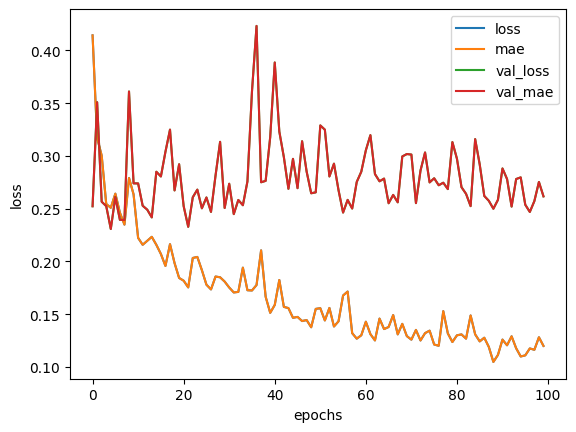

In [90]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

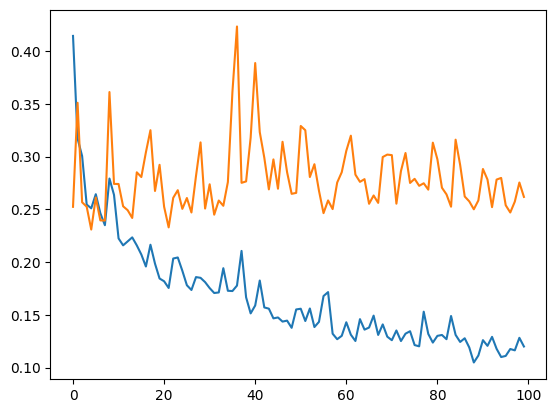

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# As you can see a gap between val_loss and training loss which prove overfitting

In [131]:
# Using Early Stopping -> There will be no change in model architecture and compling
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience=60,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [93]:
# Model 3 -> Applying early stopping on custom tuned architecture
history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks=callback)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1122 - mae: 0.1122 - val_loss: 0.2446 - val_mae: 0.2446
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1305 - mae: 0.1305 - val_loss: 0.2931 - val_mae: 0.2931
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1336 - mae: 0.1336 - val_loss: 0.2684 - val_mae: 0.2684
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1205 - mae: 0.1205 - val_loss: 0.2706 - val_mae: 0.2706
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1008 - mae: 0.1008 - val_loss: 0.2515 - val_mae: 0.2515
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1048 - mae: 0.1048 - val_loss: 0.2648 - val_mae: 0.2648
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1130 - mae: 0.1130 - val_loss: 0.2445 - val_mae: 0.2445
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1080 - mae: 0.1080 - val_loss: 0.2580 - val_mae: 0.2580
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.136

In [94]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)
# From the evaluate you can see the model is little overfitting

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2348 - mae: 0.2348 


In [177]:
# Data Scaling -> Either do standardization (-1, 1) or normalization (0, 1)
Already done

SyntaxError: invalid syntax (3044894331.py, line 2)

In [ ]:
Overfitting -> Loss on training data is low but high on testing data

# How to know overfitting
1. Check graph of val_loss and loss -> If val_loss is more than loss there is overfitting
2. Evaluate the model if testing loss is more than training loss then overfitting

To reduce overfitting

1. Add more data
    1. Add more rows
    2. Data augmentation
2. Reduce complexity of architecture
3. Early Stopping
4. Regularization
    1. L1
    2. L2
    3. L1 and L2
5. Dropout

In [ ]:
# Dropout Layer -> for each epoch randomly switch off some of the layers from hidden layer 
#                  and input layer
You can say for each epoch there is a diff architecture of your NN
Why this works ?
It gives neurons of hidden layers to focus on other features equally
It is similar to random forest 
It is only while training the model

Usually keep value of p between 0.2 to 0.5
If you see overfitting -> Increase value of p 
If you see underfitting -> Decrease value of p

Don't directly apply dropout after each layer first apply it after last layer and see if any
improvement if not then add dropout after other layers

In [95]:
# Model 4 -> Applying dropout layers without early stopping
tf.random.set_seed(42)
from tensorflow.keras.layers import Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks=callback)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6521 - mae: 0.6521 - val_loss: 0.3335 - val_mae: 0.3335
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4686 - mae: 0.4686 - val_loss: 0.2678 - val_mae: 0.2678
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4049 - mae: 0.4049 - val_loss: 0.2613 - val_mae: 0.2613
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4237 - mae: 0.4237 - val_loss: 0.2961 - val_mae: 0.2961
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3950 - mae: 0.3950 - val_loss: 0.3511 - val_mae: 0.3511
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3936 - mae: 0.3936 - val_loss: 0.2773 - val_mae: 0.2773
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3985 - mae: 0.3985 - val_loss: 0.2566 - val_mae: 0.2566
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3849 - mae: 0.3849 - val_loss: 0.2577 - val_mae: 0.2577
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.371

In [96]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2235 - mae: 0.2235 


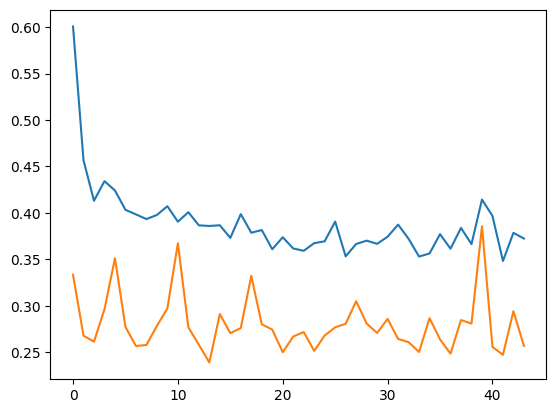

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# You can see the gap is decreasing

In [98]:
# Model 4 -> Applying dropout layers without early stopping
tf.random.set_seed(42)
from tensorflow.keras.layers import Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 300, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks=callback)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6079 - mae: 0.6079 - val_loss: 0.3248 - val_mae: 0.3248
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4009 - mae: 0.4009 - val_loss: 0.3271 - val_mae: 0.3271
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3780 - mae: 0.3780 - val_loss: 0.2713 - val_mae: 0.2713
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3661 - mae: 0.3661 - val_loss: 0.3247 - val_mae: 0.3247
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3993 - mae: 0.3993 - val_loss: 0.2649 - val_mae: 0.2649
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3600 - mae: 0.3600 - val_loss: 0.2534 - val_mae: 0.2534
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3570 - mae: 0.3570 - val_loss: 0.2744 - val_mae: 0.2744
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3413 - mae: 0.3413 - val_loss: 0.3309 - val_mae: 0.3309
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.359

In [99]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3117 - mae: 0.3117 


In [100]:
# Regularization -> Used to reduce overfitting
# Model 1
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5968 - mae: 0.5968 - val_loss: 0.4610 - val_mae: 0.4610
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4197 - mae: 0.4197 - val_loss: 0.4009 - val_mae: 0.4009
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3616 - mae: 0.3616 - val_loss: 0.2513 - val_mae: 0.2513
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2648 - mae: 0.2648 - val_loss: 0.2482 - val_mae: 0.2482
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2512 - mae: 0.2512 - val_loss: 0.2424 - val_mae: 0.2424
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2422 - mae: 0.2422 - val_loss: 0.2618 - val_mae: 0.2618
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2462 - mae: 0.2462 - val_loss: 0.2524 - val_mae: 0.2524
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2516 - mae: 0.2516 - val_loss: 0.2846 - val_mae: 0.2846
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.233

In [101]:
# The data seems to be overfitting
Regularization -> You add a penalty term in the cost function
By applying regularization gradually your weights will get closer to 0

SyntaxError: invalid syntax (131690202.py, line 2)

In [102]:
# Model 5 -> Doing regularization and early stopping
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks=callback)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4457 - mae: 0.4987 - val_loss: 0.3928 - val_mae: 0.2784
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3839 - mae: 0.2975 - val_loss: 0.3723 - val_mae: 0.3153
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3595 - mae: 0.3078 - val_loss: 0.3381 - val_mae: 0.2942
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3097 - mae: 0.2688 - val_loss: 0.3026 - val_mae: 0.2657
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3193 - mae: 0.2821 - val_loss: 0.3042 - val_mae: 0.2671
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3016 - mae: 0.2649 - val_loss: 0.3249 - val_mae: 0.2882
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3321 - mae: 0.2961 - val_loss: 0.3228 - val_mae: 0.2826
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3161 - mae: 0.2782 - val_loss: 0.3254 - val_mae: 0.2894
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.332

In [103]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3897 - mae: 0.2753 


In [104]:
# Model 6 -> Combining regularization, early stopping and dropout
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.35),    
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks=callback)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.5403 - mae: 0.5441 - val_loss: 0.3818 - val_mae: 0.2867
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4629 - mae: 0.3908 - val_loss: 0.3153 - val_mae: 0.2657
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4396 - mae: 0.3962 - val_loss: 0.3221 - val_mae: 0.2875
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4246 - mae: 0.3907 - val_loss: 0.3981 - val_mae: 0.3666
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4282 - mae: 0.3943 - val_loss: 0.3244 - val_mae: 0.2925
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3882 - mae: 0.3565 - val_loss: 0.3017 - val_mae: 0.2730
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3986 - mae: 0.3679 - val_loss: 0.3035 - val_mae: 0.2732
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3811 - mae: 0.3489 - val_loss: 0.3159 - val_mae: 0.2858
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.398

In [105]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3678 - mae: 0.2727 


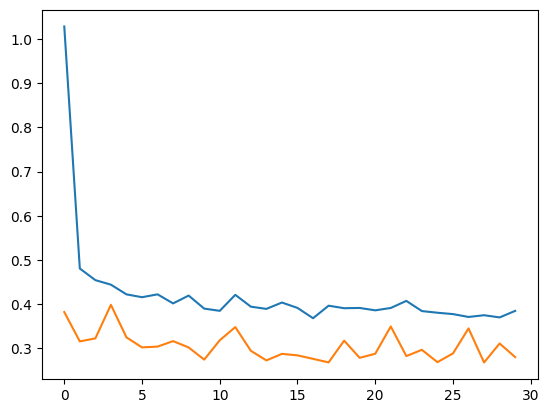

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# Here you can see the val_loss and loss is going side by side 

In [ ]:
# Activation functions
Each neuron takes the sum of weighted inputs and bias and pass it to a function 
this is the activation function
Need -> It helps to add non linearity to the model
Without activation function -> Your ANN will behave as a linear model

Ideal activation function -> 
1. Non-linear
2. It should be differentiable
3. It should be computationally inexpensive
4. It should be zero centered or normalized
5. It should be non saturating 
(It should not be a function which will take the input and give output in a range)

1. Sigmoid function
Used in output layer of binary classfier
Is not used in hidden layers it's only used in output layer
    Advantages
    1. The output of this funtions is between 0 and 1 
    2. So it can be treated as probablity and can be used in problems of binary classification
    3. It's a non linear function -> So can be used in non linear data
    4. It is differentiable
    
    Disadvantages 
    1. Saturating function -> Due to which it has problem of vanishing gradient
    means that it while doing backpropogation the weights will be close to zero 
    and no updation while another backpropogation
    2. It is non zero centered -> The output will not be normalized so training will be slow
    3. Computationally expensive
    
2. Tanh
The output is between -1 and 1
    Advantages
    1. Non linear
    2. Differentiable
    3. Zero centered -> Faster training
    Disadvantages
    1. Saturating funtions -> Vanishing gradient problem
    2. Computationally expensive
    
3. Relu
Mostly used in hidden layers
Best choice for hidden layers
    Advantages
    1. Non linear
    2. Not saturated in postive side
    3. Computationally inexpensive
    4. Convergence faster than sigmoid and tanh
    Disadvantages
    1. Not differentiable at 0
    2. Not zero centered

Problem with relu
Dying relu problem -> Sometimes when you use relu activation function output of a neuron becomes 0
This is known as dead neuron -> It's forever dead once it gives ouput 0
If the weighted sum of inputs and bias is negative then the relu will give output 0 and 
If this happens it's derivative will also be zero then there will be no weight updation

# When will the weighted sum of inputs and bias will become negative
    1. Your learning rate is very high
    2. High negative bias 
Solutions to Dying relu problem
    1. Set low learning rate
    2. Do positive initialization of bais (generally -> 0.01)
    3. Don't use relu use variants of relu

By keeping the positive points of relu which will get rid of the problem of dying relu
Linear variants -> Got by doing linear transformation on relu
Non linear variants -> Got by doing non linear transformation on relu

4. Leaky relu
Linear variant
You will not get dying relu problem 
Advantages 
1. Non saturated on both sides
2. Easily computed
3. No dying relu problem
4. Zero centered

5. Parametric relu
Linear relu
Here there is `a` trainable parameter which gives flexibilty and 
good performance than leaky relu sometimes

6. Elu
Non linear relu
Performance is better than relu at some datasets
Advantages 
1. Zero centered
2. Always continuous and differentiable
Disadvantages
1. Computationally expensive

7. Selu
Non linear relu
Good performance
It is self normalizing (activation is normalized)
Advantages
1. Good convergence

To solve problem of zero centered -> Use Batch Normalization

In [ ]:
# Weight Initialization
Default is -> 'glorol_normal'
If you did not intialize your weight good then 
1. Vanishing gradient problem
2. Exploding gradient problem
3. Slow convergence

Dont's
1. Your initial weights should not be 0
2. Your initial weights should not be the same contant
3. Random initialization -> With small values -> Very slow convergence in case of relu
4. Random initialization -> With large values -> You should not do

Do's 
1. Xavier / Glorat Initialization 
    1. Normal
    2. Uniform
Use when you are using 'tanh' and 'sigmoid'

2. He Initialization
    1. Normal 
    2. Uniform
Use when you are using 'relu'

You can initialize your baises with 0 

In [124]:
# Model - 7 -> Using only weight initialization 
# Model 6 -> Combining regularization, early stopping and dropout
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(200, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9403 - mae: 0.9403 - val_loss: 0.3517 - val_mae: 0.3517
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3078 - mae: 0.3078 - val_loss: 0.3149 - val_mae: 0.3149
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2779 - mae: 0.2779 - val_loss: 0.2509 - val_mae: 0.2509
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2395 - mae: 0.2395 - val_loss: 0.2589 - val_mae: 0.2589
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2414 - mae: 0.2414 - val_loss: 0.2615 - val_mae: 0.2615
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2289 - mae: 0.2289 - val_loss: 0.2713 - val_mae: 0.2713
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2191 - mae: 0.2191 - val_loss: 0.3528 - val_mae: 0.3528
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2510 - mae: 0.2510 - val_loss: 0.2572 - val_mae: 0.2572
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.208

In [125]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3033 - mae: 0.3033 


In [109]:
# Model 8 -> Combining regularization, early stopping, dropout and weight initialization
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(200, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.35),    
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks=callback)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.9430 - mae: 0.7717 - val_loss: 1.8926 - val_mae: 0.5281
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3475 - mae: 0.5383 - val_loss: 0.4842 - val_mae: 0.3790
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5343 - mae: 0.4564 - val_loss: 0.4867 - val_mae: 0.4351
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5323 - mae: 0.4841 - val_loss: 0.3776 - val_mae: 0.3284
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5023 - mae: 0.4539 - val_loss: 0.3583 - val_mae: 0.3173
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4692 - mae: 0.4309 - val_loss: 0.3841 - val_mae: 0.3546
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4497 - mae: 0.4167 - val_loss: 0.3274 - val_mae: 0.2924
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4272 - mae: 0.3931 - val_loss: 0.3373 - val_mae: 0.3090
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.439

In [110]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8767 - mae: 0.5123 


In [ ]:
# Batch Normalization  
Which makes you DNN training more faster and stable
Means you will converge faster is less epoch
When we send inputs of first layer it's normalized the output of first layer 
may or may not be normalized, this output is normalized in Batch Normalization, 
for each hidden layer

Why we need Batch Normalization ?
Because if you use with unnormalized data, then your learning rate should 
not be high and you will converge slower.

Covariate Shift
You give similar data but the distribution is not correct which will be the 
reason for less accuracy
Means -> If you train a CNN model to differentiate between rose and other flowers, 
while training you used only red rose, but while testing you gave other variants of rose as well, 
this will give less accuracy so you have to train your model again.

Internal Covariate shift
We define internal covariate shift as the change in the distribution of network activations 
due to the change in network parameters during training.
Suppose, you are training a DNN, you can see the output layers of one layer are inputs for 
another layer, and during training the distribution of weights in first half is constantly 
changing, this will cause instability in training the second half.

Now batch normalization ensures that distribution after each hidden layer will be same. 
Mean = 0 and Standard distribution = 1

How to use Batch Normalization
1. Always use batch normalization with help of Mini-Batch Gradient Descent
2. And it will be layer by layer
3. You can consider Batch Normalization as a layer

Each Batch Normalization layer will store 4 parameter for each neuron, from which 2 are trainble
and 2 are trained on data only
1. Exponentially Moving Weighted Average of Mean
2. Exponentially Moving Weighted Average of Standard Deviation
3. gamma (trainable)
4. beta (trainable)

Advantage 
1. Make our training more stable
2. Training becomes faster
3. Can act as a regularizer
4. Reduce the effect of Weight Initialization

In [111]:
# Model 9 -> Applying Batch Normalization only on one layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu',),
    tf.keras.layers.Dense(10, activation='relu',),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5650 - mae: 0.5650 - val_loss: 0.3586 - val_mae: 0.3586
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3434 - mae: 0.3434 - val_loss: 0.3094 - val_mae: 0.3094
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3319 - mae: 0.3319 - val_loss: 0.3280 - val_mae: 0.3280
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3141 - mae: 0.3141 - val_loss: 0.2921 - val_mae: 0.2921
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2941 - mae: 0.2941 - val_loss: 0.3329 - val_mae: 0.3329
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2921 - mae: 0.2921 - val_loss: 0.3305 - val_mae: 0.3305
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2841 - mae: 0.2841 - val_loss: 0.3341 - val_mae: 0.3341
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3070 - mae: 0.3070 - val_loss: 0.3317 - val_mae: 0.3317
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.287

In [112]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2914 - mae: 0.2914 


In [113]:
# Model 10 -> Applying batch normalization on every layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation='relu',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='relu',),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.8018 - mae: 0.8018 - val_loss: 1.0377 - val_mae: 1.0377
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3889 - mae: 0.3889 - val_loss: 0.3961 - val_mae: 0.3961
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3316 - mae: 0.3316 - val_loss: 0.3456 - val_mae: 0.3456
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3175 - mae: 0.3175 - val_loss: 0.3354 - val_mae: 0.3354
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3129 - mae: 0.3129 - val_loss: 0.3555 - val_mae: 0.3555
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3125 - mae: 0.3125 - val_loss: 0.2986 - val_mae: 0.2986
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2945 - mae: 0.2945 - val_loss: 0.2868 - val_mae: 0.2868
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2657 - mae: 0.2657 - val_loss: 0.2842 - val_mae: 0.2842
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.25

In [114]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3127 - mae: 0.3127 


In [120]:
# Model 11 -> Combining regularization, early stopping, dropout, 
# weight initialization, batch normalization
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.35),    
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks=callback)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 9.9948 - mae: 0.8285 - val_loss: 1.9091 - val_mae: 0.4325
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3788 - mae: 0.4753 - val_loss: 0.5801 - val_mae: 0.4352
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5630 - mae: 0.4562 - val_loss: 0.4726 - val_mae: 0.4043
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5247 - mae: 0.4609 - val_loss: 0.4675 - val_mae: 0.4152
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4857 - mae: 0.4322 - val_loss: 0.4290 - val_mae: 0.3697
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4661 - mae: 0.4122 - val_loss: 0.3728 - val_mae: 0.3225
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5102 - mae: 0.4603 - val_loss: 0.4402 - val_mae: 0.3964
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4612 - mae: 0.4175 - val_loss: 0.4208 - val_mae: 0.3783
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.491

In [121]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8986 - mae: 0.4220 


In [122]:
# Model 12 -> Combining regularization, dropout, weight initialization, batch normalization
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.35),    
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.9226 - mae: 0.8226 - val_loss: 1.9304 - val_mae: 0.6004
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3402 - mae: 0.5390 - val_loss: 0.6209 - val_mae: 0.5011
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5792 - mae: 0.4913 - val_loss: 0.4618 - val_mae: 0.3963
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5343 - mae: 0.4677 - val_loss: 0.4717 - val_mae: 0.4129
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4929 - mae: 0.4387 - val_loss: 0.4714 - val_mae: 0.4194
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4838 - mae: 0.4278 - val_loss: 0.3870 - val_mae: 0.3330
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4984 - mae: 0.4418 - val_loss: 0.3585 - val_mae: 0.3033
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4719 - mae: 0.4223 - val_loss: 0.4655 - val_mae: 0.4184
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.465

In [123]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3235 - mae: 0.3007 


In [ ]:
# Doubling the data and using Model 12
import numpy as np

noise_factor = 0.01
X_train_augmented = X_train_normalized + noise_factor * np.random.normal(loc=0.0, 
                                                              scale=1.0, 
                                                              size=X_train.shape)

X_train_final = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_final = np.concatenate((y_train, y_train_scaled_tf), axis=0)


In [126]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

X_train_np = X_train.numpy()
y_train_np = y_train.numpy()

noise_factor = 0.01
X_train_augmented = X_train_np + noise_factor * np.random.normal(loc=0.0, 
                                                                 scale=1.0, 
                                                                 size=X_train_np.shape)
y_train_augmented = y_train_np.copy()  

X_train_final = np.concatenate((X_train_np, X_train_augmented), axis=0)
y_train_final = np.concatenate((y_train_np, y_train_augmented), axis=0)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_final)
X_test_normalized = scaler.transform(X_test.numpy())  

y_train_final_reshaped = y_train_final.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_final_reshaped)
y_train_scaled_tf = tf.convert_to_tensor(y_train_scaled)

y_test_np = y_test.numpy().reshape(-1, 1)
y_test_scaled = scaler.transform(y_test_np)  
y_test_scaled_tf = tf.convert_to_tensor(y_test_scaled)

print("X_train_final shape:", X_train_final.shape)
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_scaled_tf shape:", y_train_scaled_tf.shape)

X_train_final shape: (2336, 24)
X_train_normalized shape: (2336, 24)
y_train_scaled_tf shape: (2336, 1)


In [132]:
# Model 13 -> Combining regularization, dropout, weight initialization, batch normalization
# On double the size of data
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.35),    
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 300, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
                    callbacks = callback
)

Epoch 1/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.4509 - mae: 0.7372 - val_loss: 0.7846 - val_mae: 0.6472
Epoch 2/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5865 - mae: 0.4978 - val_loss: 0.6595 - val_mae: 0.6098
Epoch 3/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5191 - mae: 0.4601 - val_loss: 0.5862 - val_mae: 0.5428
Epoch 4/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4976 - mae: 0.4443 - val_loss: 0.4443 - val_mae: 0.3948
Epoch 5/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4643 - mae: 0.4160 - val_loss: 0.4849 - val_mae: 0.4408
Epoch 6/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4669 - mae: 0.4166 - val_loss: 0.4265 - val_mae: 0.3824
Epoch 7/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4743 - mae: 0.4314 - val_loss: 0.4412 - val_mae: 0.4062
Epoch 8/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4588 - mae: 0.4215 - val_loss: 0.4707 - val_mae: 0.4288
Epoch 9/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.459

In [133]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2910 - mae: 0.2731 


In [134]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

X_train_np = X_train.numpy()
y_train_np = y_train.numpy()

noise_factor = 0.0001
X_train_augmented = X_train_np + noise_factor * np.random.normal(loc=0.0, 
                                                                 scale=1.0, 
                                                                 size=X_train_np.shape)
y_train_augmented = y_train_np.copy()  

X_train_final = np.concatenate((X_train_np, X_train_augmented), axis=0)
y_train_final = np.concatenate((y_train_np, y_train_augmented), axis=0)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_final)
X_test_normalized = scaler.transform(X_test.numpy())  

y_train_final_reshaped = y_train_final.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_final_reshaped)
y_train_scaled_tf = tf.convert_to_tensor(y_train_scaled)

y_test_np = y_test.numpy().reshape(-1, 1)
y_test_scaled = scaler.transform(y_test_np)  
y_test_scaled_tf = tf.convert_to_tensor(y_test_scaled)

print("X_train_final shape:", X_train_final.shape)
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_scaled_tf shape:", y_train_scaled_tf.shape)

X_train_final shape: (2336, 24)
X_train_normalized shape: (2336, 24)
y_train_scaled_tf shape: (2336, 1)


In [137]:
# Model 14 -> Combining regularization, dropout, weight initialization, batch normalization
# On double the size of data
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.35),    
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 300, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
)

Epoch 1/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.8055 - mae: 0.7531 - val_loss: 0.8191 - val_mae: 0.6524
Epoch 2/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5820 - mae: 0.4759 - val_loss: 0.5358 - val_mae: 0.4900
Epoch 3/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4948 - mae: 0.4455 - val_loss: 0.4546 - val_mae: 0.3963
Epoch 4/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4952 - mae: 0.4383 - val_loss: 0.5532 - val_mae: 0.4915
Epoch 5/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4807 - mae: 0.4213 - val_loss: 0.4942 - val_mae: 0.4540
Epoch 6/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4409 - mae: 0.3953 - val_loss: 0.5171 - val_mae: 0.4778
Epoch 7/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4550 - mae: 0.4119 - val_loss: 0.5241 - val_mae: 0.4890
Epoch 8/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4622 - mae: 0.4193 - val_loss: 0.3893 - val_mae: 0.3495
Epoch 9/300
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.437

In [139]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3202 - mae: 0.3113 


In [143]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

X_train_np = X_train.numpy()
y_train_np = y_train.numpy()

X_train_augmented = X_train_np.copy()  
y_train_augmented = y_train_np.copy()

noise_factor = 0.0001
for _ in range(9):
    X_train_noisy = X_train_np + noise_factor * np.random.normal(loc=0.0, scale=1.0, 
                                                                 size=X_train_np.shape)
    X_train_augmented = np.concatenate((X_train_augmented, X_train_noisy), axis=0)
    y_train_augmented = np.concatenate((y_train_augmented, y_train_np), axis=0)  

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_augmented)
X_test_normalized = scaler.transform(X_test.numpy()) 

y_train_augmented_reshaped = y_train_augmented.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_augmented_reshaped)
y_train_scaled_tf = tf.convert_to_tensor(y_train_scaled)

y_test_np = y_test.numpy().reshape(-1, 1)
y_test_scaled = scaler.transform(y_test_np)  
y_test_scaled_tf = tf.convert_to_tensor(y_test_scaled)

print("X_train_augmented shape:", X_train_augmented.shape)
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_scaled_tf shape:", y_train_scaled_tf.shape)

X_train_augmented shape: (11680, 24)
X_train_normalized shape: (11680, 24)
y_train_scaled_tf shape: (11680, 1)


In [144]:
# Model 15 -> Combining regularization, dropout, weight initialization, batch normalization
# On 10 times of the size of data
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.03),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.35),    
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

history = model.fit(X_train_normalized, 
                    y_train_scaled_tf, 
                    epochs = 300, 
                    verbose = 1, 
                    validation_data = (X_test_normalized, 
                                       y_test_scaled_tf),
)

Epoch 1/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8482 - mae: 0.5327 - val_loss: 0.5026 - val_mae: 0.4628
Epoch 2/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4531 - mae: 0.4131 - val_loss: 0.3816 - val_mae: 0.3468
Epoch 3/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4228 - mae: 0.3932 - val_loss: 0.3996 - val_mae: 0.3745
Epoch 4/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4148 - mae: 0.3908 - val_loss: 0.4098 - val_mae: 0.3872
Epoch 5/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4166 - mae: 0.3941 - val_loss: 0.4052 - val_mae: 0.3830
Epoch 6/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4071 - mae: 0.3840 - val_loss: 0.4069 - val_mae: 0.3864
Epoch 7/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4102 - mae: 0.3884 - val_loss: 0.3725 - val_mae: 0.3547
Epoch 8/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3993 - mae: 0.3812 - val_loss: 0.3632 - val_mae: 0.3474
Epoch 9/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [145]:
y_preds_scaled = model.predict(X_test_normalized)
loss, mae = model.evaluate(X_test_normalized, y_test_scaled_tf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3504 - mae: 0.3303 


In [59]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

y_train_np = y_train.numpy().reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_np)
y_train_scaled_tf = tf.convert_to_tensor(y_train_scaled)
y_test_np = y_test.numpy().reshape(-1, 1)
y_test_scaled = scaler.fit_transform(y_test_np)
y_test_scaled_tf = tf.convert_to_tensor(y_test_scaled)
X_train_df = pd.DataFrame(X_train_normalized)  
y_train_series = pd.DataFrame(y_train_scaled)

In [51]:
!pip install tpot

In [62]:
# Model 16 -> Using Tpot for model training

import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tpot import TPOTRegressor

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)  

y_train_np = y_train.numpy().reshape(-1, 1)
y_test_np = y_test.numpy().reshape(-1, 1)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_np)
y_test_scaled = scaler_y.transform(y_test_np)  

X_train_df = pd.DataFrame(X_train_normalized)  
y_train_series = pd.DataFrame(y_train_scaled).values.ravel() 
y_test_series = pd.DataFrame(y_test_scaled).values.ravel()    

X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train_df, 
    y_train_series,  
    test_size=0.2, 
    random_state=42
)

tpot = TPOTRegressor(
    generations=5,
    population_size=20,
    random_state=42,
    verbosity=2,
    config_dict='TPOT sparse'
)

tpot.fit(X_train_split, y_train_split)

y_pred = tpot.predict(X_valid_split)

score = mean_absolute_error(y_valid_split, y_pred)
print(f"Best model MAE: {score}")

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.168649580209892

Generation 2 - Current best internal CV score: -0.168649580209892

Generation 3 - Current best internal CV score: -0.168649580209892

Generation 4 - Current best internal CV score: -0.168649580209892

Generation 5 - Current best internal CV score: -0.1671449465557232

Best pipeline: XGBRegressor(XGBRegressor(RidgeCV(input_matrix), learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.6000000000000001, verbosity=0), learning_rate=0.1, max_depth=2, min_child_weight=6, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.15000000000000002, verbosity=0)
Best model MAE: 0.2558442984512155


In [63]:
!pip install h2o

In [64]:
# Model 17 -> Using h2o for model training

import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

h2o.init()

X_train_df = pd.DataFrame(X_train_normalized)
y_train_series = pd.DataFrame(y_train_scaled).values.ravel()  
X_test_df = pd.DataFrame(X_test_normalized)
y_test_series = pd.DataFrame(y_test_scaled).values.ravel()  

X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train_df, 
    y_train_series, 
    test_size=0.2, 
    random_state=42
)

X_train_h2o = h2o.H2OFrame(X_train_split)
y_train_h2o = h2o.H2OFrame(pd.DataFrame(y_train_split, columns=['target']))
X_valid_h2o = h2o.H2OFrame(X_valid_split)
y_valid_h2o = h2o.H2OFrame(pd.DataFrame(y_valid_split, columns=['target']))

train_h2o = X_train_h2o.cbind(y_train_h2o)

automl = H2OAutoML(
    max_models=20,        
    seed=42,
    max_runtime_secs=3600 
)

automl.train(
    x=X_train_df.columns.tolist(),
    y='target',
    training_frame=train_h2o
)

best_model = automl.leader
preds = best_model.predict(X_valid_h2o)

preds_df = preds.as_data_frame().values.ravel()

mae = mean_absolute_error(y_valid_split, preds_df)
print(f"Best model MAE: {mae}")

h2o.shutdown(prompt=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5ctad8tp
  JVM stdout: /tmp/tmp5ctad8tp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5ctad8tp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_7qj1ug
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Best model MAE: 0.2385076489162286
H2O session _sid_8906 closed.


/opt/conda/lib/python3.10/site-packages/h2o/frame.py:1981: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)


/tmp/ipykernel_33/2845190230.py:49: H2ODeprecationWarning:

Deprecated, use ``h2o.cluster().shutdown()``.



In [65]:
print(f"Best model MAE: {mae}")

print("Model Summary:")
print(best_model.summary())

print("Model Parameters:")
print(best_model.params)

print("Model Performance:")
performance = best_model.model_performance(X_valid_h2o)
print(performance)

Best model MAE: 0.2385076489162286
Model Summary:
Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       11/20
# GBM base models (used / total)           4/7
# XGBoost base models (used / total)       3/6
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  3/4
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None
Model Parameters:
{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_AllModels_1_AutoML_1_20240817_123805', 'type': 'Key<Model>', 'URL': '/